# Model for Hand Landmarks

### Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("data/landmark_locations.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5325 entries, 0 to 5324
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WRIST_X              5325 non-null   float64
 1   WRIST_Y              5325 non-null   float64
 2   Letter               5325 non-null   object 
 3   THUMB_CMC_X          5325 non-null   float64
 4   THUMB_CMC_Y          5325 non-null   float64
 5   THUMB_MCP_X          5325 non-null   float64
 6   THUMB_MCP_Y          5325 non-null   float64
 7   THUMB_IP_X           5325 non-null   float64
 8   THUMB_IP_Y           5325 non-null   float64
 9   THUMB_TIP_X          5325 non-null   float64
 10  THUMB_TIP_Y          5325 non-null   float64
 11  INDEX_FINGER_MCP_X   5325 non-null   float64
 12  INDEX_FINGER_MCP_Y   5325 non-null   float64
 13  INDEX_FINGER_PIP_X   5325 non-null   float64
 14  INDEX_FINGER_PIP_Y   5325 non-null   float64
 15  INDEX_FINGER_DIP_X   5325 non-null   f

In [4]:
df['Letter'].unique()

array(['a', 'b', 'd', 'e', 'f', 'h', 'i', 'k', 'l', 'm', 'n', 'p', 'q',
       't', 'u', 'v', 'w', 'y', 'c', 'g', 'o', 'r', 'x'], dtype=object)

In [5]:
df.head()

,WRIST_X,WRIST_Y,Letter,THUMB_CMC_X,THUMB_CMC_Y,THUMB_MCP_X,THUMB_MCP_Y,THUMB_IP_X,THUMB_IP_Y,THUMB_TIP_X,...,RING_FINGER_TIP_X,RING_FINGER_TIP_Y,PINKY_MCP_X,PINKY_MCP_Y,PINKY_PIP_X,PINKY_PIP_Y,PINKY_DIP_X,PINKY_DIP_Y,PINKY_TIP_X,PINKY_TIP_Y
0,0.549741,0.806314,a,0.478870,0.730268,0.443897,0.562370,0.435461,0.426004,0.428723,...,0.544214,0.496491,0.609634,0.480920,0.607194,0.370279,0.586257,0.424699,0.578705,0.490445
1,0.550903,0.807938,a,0.480252,0.731891,0.444677,0.563318,0.436595,0.428557,0.428147,...,0.543923,0.496591,0.610477,0.478628,0.607984,0.368154,0.587011,0.423518,0.579195,0.489630
2,0.546920,0.800893,a,0.474883,0.724740,0.439800,0.560035,0.430985,0.424709,0.419549,...,0.541135,0.494007,0.606882,0.476591,0.605523,0.366041,0.583733,0.422533,0.574113,0.489113
3,0.546462,0.801266,a,0.475197,0.731994,0.438885,0.555374,0.434032,0.411660,0.427522,...,0.539967,0.494287,0.607510,0.470473,0.605259,0.357664,0.583582,0.417015,0.574945,0.484437
4,0.544573,0.816253,a,0.472201,0.743610,0.434722,0.566551,0.425748,0.423913,0.416086,...,0.538124,0.498910,0.607630,0.477190,0.606138,0.360823,0.584313,0.419477,0.576031,0.487795


In [6]:
df.columns

Index(['WRIST_X', 'WRIST_Y', 'Letter', 'THUMB_CMC_X', 'THUMB_CMC_Y',
       'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y',
       'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_DIP_X',
       'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y',
       'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_PIP_X',
       'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y',
       'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y', 'RING_FINGER_MCP_X',
       'RING_FINGER_MCP_Y', 'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y',
       'RING_FINGER_DIP_X', 'RING_FINGER_DIP_Y', 'RING_FINGER_TIP_X',
       'RING_FINGER_TIP_Y', 'PINKY_MCP_X', 'PINKY_MCP_Y', 'PINKY_PIP_X',
       'PINKY_PIP_Y', 'PINKY_DIP_X', 'PINKY_DIP_Y', 'PINKY_TIP_X',
       'PINKY_TIP_Y'],
      dtype='object')

### Extract Data

In [7]:
# Extract Data
features = ['WRIST_X', 'WRIST_Y', 'THUMB_CMC_X', 'THUMB_CMC_Y', 'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y', 
       'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y', 'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y', 
       'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y', 'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y', 
       'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y', 'RING_FINGER_DIP_X', 'RING_FINGER_DIP_Y', 'RING_FINGER_TIP_X', 'RING_FINGER_TIP_Y', 'PINKY_MCP_X', 
       'PINKY_MCP_Y', 'PINKY_PIP_X', 'PINKY_PIP_Y', 'PINKY_DIP_X', 'PINKY_DIP_Y', 'PINKY_TIP_X', 'PINKY_TIP_Y']
X = df[features]
y = df["Letter"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

No need to scale data because they're already scaled on range 0-1.

### Hyperparameter Tuning

Selecting K with 5-fold cross validation.

In [8]:
# Defining a range of k values to test
k_values = list(range(1, 25, 2))

# Initialize a list for cross-validation scores
cv_scores = []

# Perform 5-fold cross-validation
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

    print(k, scores)
    # Average all 5 scores
    cv_scores.append(scores.mean())

1 [1.         0.99765258 1.         0.99882629 0.99765258]
3 [1.         0.99647887 0.99647887 0.99765258 0.99530516]
5 [1.         0.99647887 0.99530516 0.99647887 0.99530516]
7 [1.         0.99530516 0.99530516 0.99530516 0.99530516]
9 [1.         0.99413146 0.99530516 0.99647887 0.99530516]
11 [1.         0.99413146 0.99413146 0.99647887 0.99413146]
13 [0.99765258 0.99530516 0.99413146 0.99530516 0.99413146]
15 [0.99765258 0.99413146 0.99295775 0.99295775 0.99178404]
17 [0.99647887 0.99295775 0.99178404 0.99295775 0.9870892 ]
19 [0.99647887 0.99295775 0.9870892  0.99178404 0.98591549]
21 [0.99647887 0.98943662 0.98239437 0.98826291 0.98474178]
23 [0.99530516 0.98943662 0.98356808 0.9870892  0.98474178]


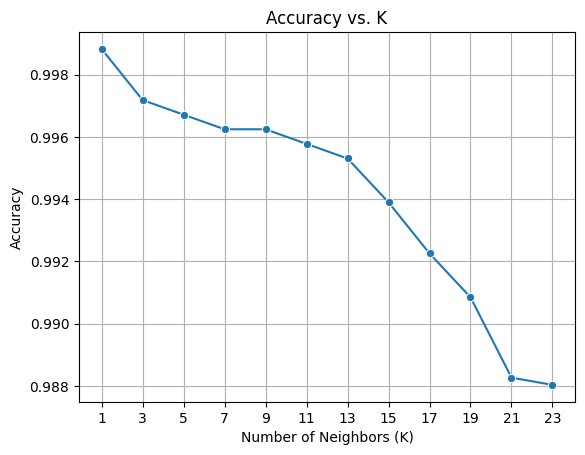

In [9]:
# Plot our Cross Validation Results
sns.lineplot(x=k_values, y=cv_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

Chose K=9 for my model.

### Building the model

In [10]:
# Create the model
model = KNeighborsClassifier(n_neighbors=9)

# Train the model
model = model.fit(X_train, y_train)

### Evaluations

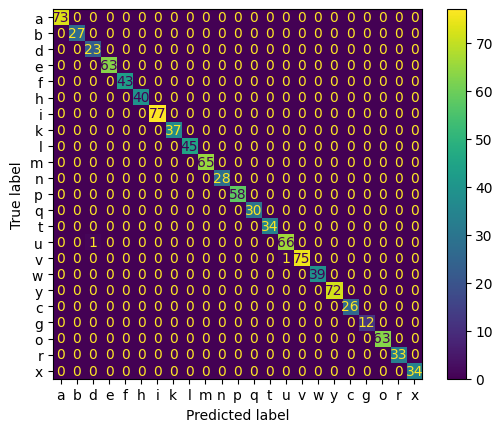

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a confusion matrix
labels = df["Letter"].unique()
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
disp.plot()

In [12]:
# Accuracy as shown by the confusion matrix
model.score(X_test, y_test)

0.9981220657276996